In [3]:
!conda install -y cuda -c nvidia/label/cuda-11.4.0

Solving environment: | ^C
failed with initial frozen solve. Retrying with flexible solve.

CondaError: KeyboardInterrupt



In [3]:
!conda install -y cuquantum -c conda-forge 

Solving environment: done

## Package Plan ##

  environment location: /opt/conda

  added / updated specs:
    - cuquantum


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    cudatoolkit-11.8.0         |      h37601d7_11       635.9 MB  conda-forge
    cuquantum-22.11.0.13       |       h0bbbad9_2         120 KB  conda-forge
    custatevec-1.2.0           |       h0800d71_2         7.1 MB  conda-forge
    cutensor-1.6.2.3           |       h12f7317_0        82.9 MB  conda-forge
    cutensornet-2.0.0          |nompi_h0800d71_103         1.4 MB  conda-forge
    ------------------------------------------------------------
                                           Total:       727.4 MB

The following NEW packages will be INSTALLED:

  cudatoolkit        conda-forge/linux-64::cudatoolkit-11.8.0-h37601d7_11 
  cuquantum          conda-forge/linux-64::cuquantum-22.11.0.13-h0bbbad9_2 
  custatev

In [4]:
!pip install cuquantum

  Using cached cuquantum-22.11.0-py3-none-manylinux2014_x86_64.whl (6.9 kB)
  Using cached cuquantum_cu11-22.11.0-py3-none-manylinux2014_x86_64.whl (7.0 kB)
  Using cached cutensornet_cu11-2.0.0-py3-none-manylinux2014_x86_64.whl (1.7 MB)
  Using cached custatevec_cu11-1.2.0-py3-none-manylinux2014_x86_64.whl (14.2 MB)
  Using cached cutensor_cu11-1.6.2-py3-none-manylinux2014_x86_64.whl (139.8 MB)


In [5]:
!pip install medmnist

  Using cached medmnist-2.1.0-py3-none-any.whl (21 kB)
  Using cached torch-1.13.1-cp310-cp310-manylinux1_x86_64.whl (887.5 MB)
  Using cached torchvision-0.14.1-cp310-cp310-manylinux1_x86_64.whl (24.2 MB)
  Using cached fire-0.5.0-py2.py3-none-any.whl
  Using cached termcolor-2.2.0-py3-none-any.whl (6.6 kB)
  Using cached nvidia_cuda_nvrtc_cu11-11.7.99-2-py3-none-manylinux1_x86_64.whl (21.0 MB)
  Using cached nvidia_cudnn_cu11-8.5.0.96-2-py3-none-manylinux1_x86_64.whl (557.1 MB)
  Using cached nvidia_cuda_runtime_cu11-11.7.99-py3-none-manylinux1_x86_64.whl (849 kB)
  Using cached nvidia_cublas_cu11-11.10.3.66-py3-none-manylinux1_x86_64.whl (317.1 MB)


In [6]:
!pip install  PennyLane==0.27.0 PennyLane-Lightning==0.27.0 Pennylane-lightning-gpu==0.27.0

  Using cached PennyLane-0.27.0-py3-none-any.whl (1.1 MB)
  Using cached PennyLane_Lightning-0.27.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (15.4 MB)
  Using cached PennyLane_Lightning_GPU-0.27.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (28.7 MB)
  Using cached autograd-1.5-py3-none-any.whl (48 kB)
  Using cached autoray-0.6.0-py3-none-any.whl (46 kB)
  Using cached retworkx-0.12.1-py3-none-any.whl (10 kB)
  Using cached toml-0.10.2-py2.py3-none-any.whl (16 kB)
  Using cached semantic_version-2.10.0-py2.py3-none-any.whl (15 kB)
  Using cached cachetools-5.3.0-py3-none-any.whl (9.3 kB)
  Using cached ninja-1.11.1-py2.py3-none-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (145 kB)
  Using cached cmake-3.25.2-py2.py3-none-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (23.7 MB)
  Using cached future-0.18.3-py3-none-any.whl
  Using cached rustworkx-0.12.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.9 MB)


In [7]:
!pip install idx2numpy

  Using cached idx2numpy-1.2.3-py3-none-any.whl


In [8]:
!pip install matplotlib

In [1]:
import pennylane as qml
import pennylane.numpy as np

In [10]:
def get_data():
    # pip install medmnist
    import medmnist
    from medmnist import INFO
    data_flag = 'pneumoniamnist'

    info = INFO[data_flag]
    DataClass = getattr(medmnist, info['python_class'])
    pil_dataset_train = DataClass(split='train', download=True)
    pil_dataset_test = DataClass(split='test', download=True)
    return pil_dataset_train, pil_dataset_test

data_train, data_test = get_data()
train_images = data_train.imgs/255.0
train_labels = data_train.labels

Using downloaded and verified file: /home/jovyan/.medmnist/pneumoniamnist.npz
Using downloaded and verified file: /home/jovyan/.medmnist/pneumoniamnist.npz


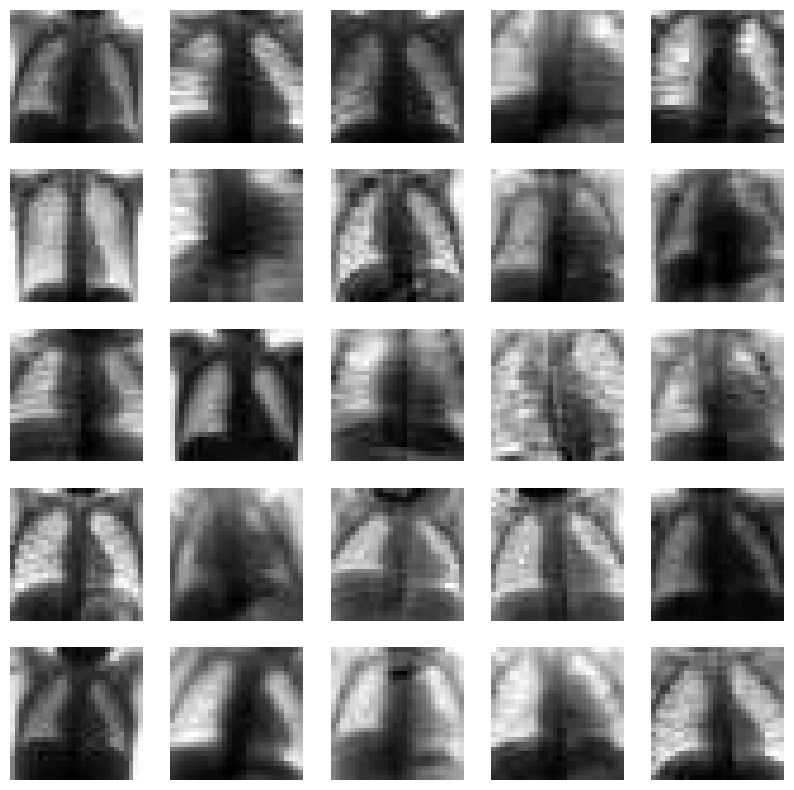

In [3]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.axis("off")

In [11]:
device = "cpu"
# device = "cuda"
import time,os,copy
import idx2numpy 
import numpy as np 
from tqdm import tqdm

seed = 42
np.random.seed(seed)

In [12]:
# splitting the full dataset of 5 classes into test and train images to ensure the testing does not happen on images from train data.
from os import mkdir
from os.path import exists
split = np.array_split(train_images,[int(len(train_images)*0.7)])
train_sequences = split[0]
test_sequences = split[1]
print(len(split[0]),len(split[1]))
split = np.array_split(train_labels,[int(len(train_labels)*0.7)])
train_labels = split[0]
test_labels = split[1]
print(len(split[0]),len(split[1]))
datalength = 5000
# we restrict the training to first 5000 images of 21000
n_steps = 10
train_sequences = np.tile(train_sequences[:, None], (1, n_steps, 1, 1))#[:datalength]
test_sequences = np.tile(test_sequences[:, None], (1, n_steps, 1, 1))
# train_labels = train_labels[:datalength]


create = True
if exists("./saved_data_PneumoniaMNIST"):
    create=False

if create:
    mkdir("./saved_data_PneumoniaMNIST")
    np.savez_compressed("./saved_data_PneumoniaMNIST/test_labels.npz",test_labels)
    np.savez_compressed(f"./saved_data_PneumoniaMNIST/test_seqs_{seed}.npz",test_sequences)
    np.savez_compressed("./saved_data_PneumoniaMNIST/train_labels.npz",train_labels)
    np.savez_compressed(f"./saved_data_PneumoniaMNIST/train_seqs_{seed}.npz",train_sequences)

print(len(test_labels),len(test_sequences),len(train_labels),len(train_sequences))

3295 1413
3295 1413
1413 1413 3295 3295


In [6]:
def salt_pepper(test_sequences,test_labels,prob,salt=0,pepper=1):
  sampled_images = test_sequences
  sampled_labels = test_labels
  for j in range(len(test_labels)):
    for i in range(np.shape(sampled_images[j])[0]):
      for y in range(28):
        for x in range(28):
          r = np.random.random() 
          if r < prob:
            sampled_images[j][i][y][x] = salt
          elif r > 1-prob:
            sampled_images[j][i][y][x] = pepper
  return sampled_images,sampled_labels

In [7]:
if create:
    for i in range(1,10,1):
        d , l =salt_pepper(np.load(f"./saved_data_PneumoniaMNIST/test_seqs_{seed}.npz")['arr_0'],np.load(f"./saved_data_PneumoniaMNIST/test_labels.npz")['arr_0'],i/100.0)
        np.savez_compressed(f"./saved_data_PneumoniaMNIST/snp_{i/100.0}_{seed}.npz",d)
    for i in range(1,6,1):
        d , l =salt_pepper(np.load(f"./saved_data_PneumoniaMNIST/test_seqs_{seed}.npz")['arr_0'],np.load(f"./saved_data_PneumoniaMNIST/test_labels.npz")['arr_0'],i/10.0)
        np.savez_compressed(f"./saved_data_PneumoniaMNIST/snp_{i/10.0}_{seed}.npz",d)

noise probability = 0.48
1noise probability = 0.18
2noise probability = 0.18
3noise probability = 0.18
4noise probability = 0.18
5noise probability = 0.18
6noise probability = 0.18
7noise probability = 0.18
8noise probability = 0.18
9

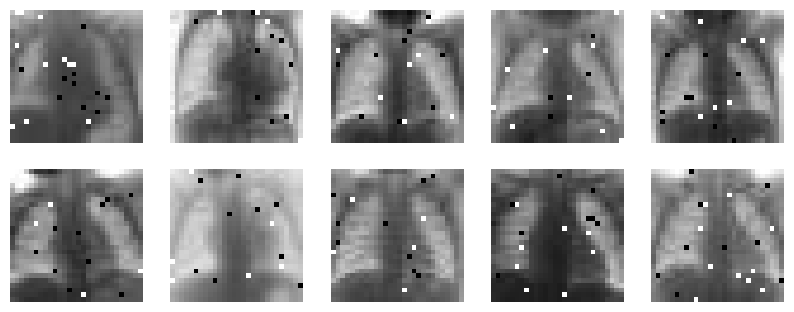

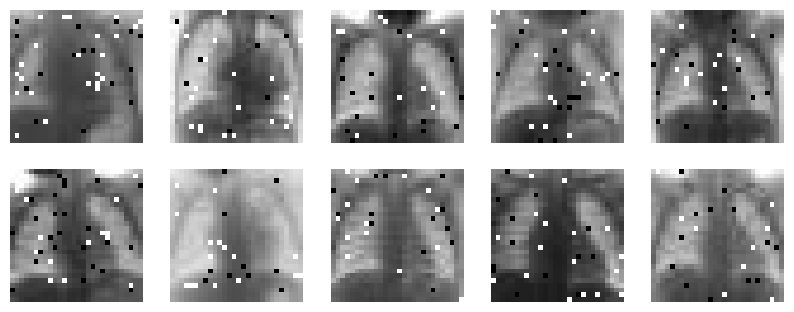

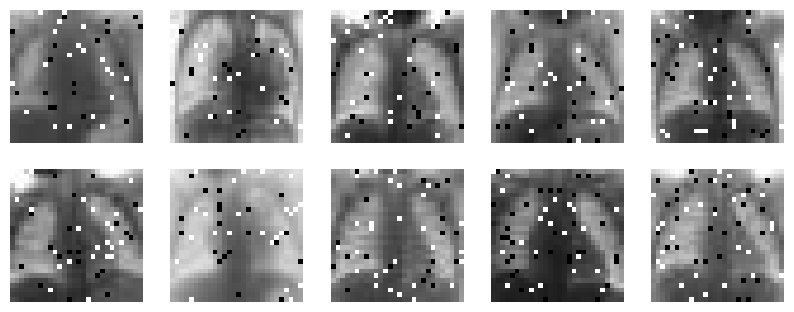

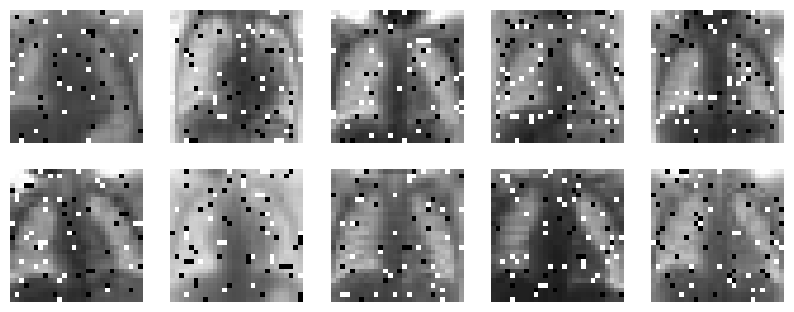

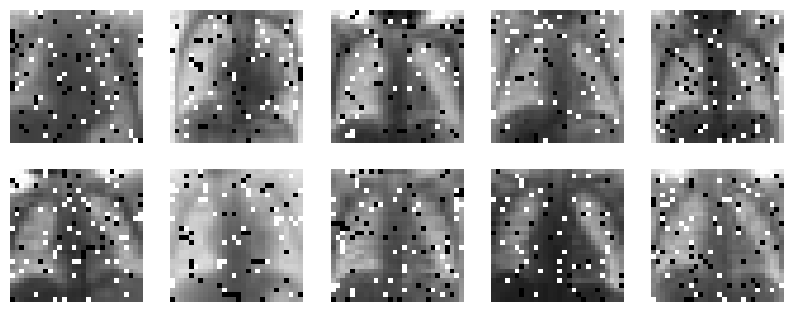

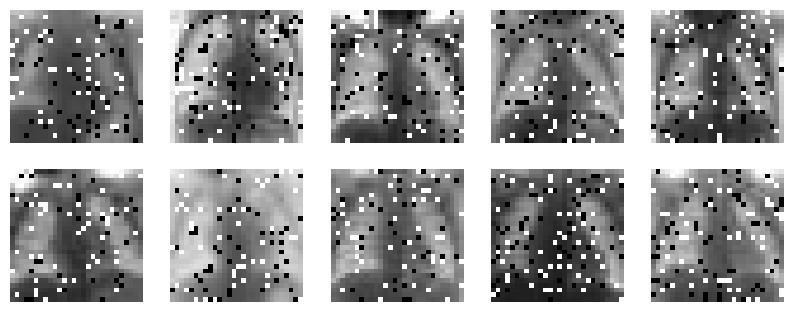

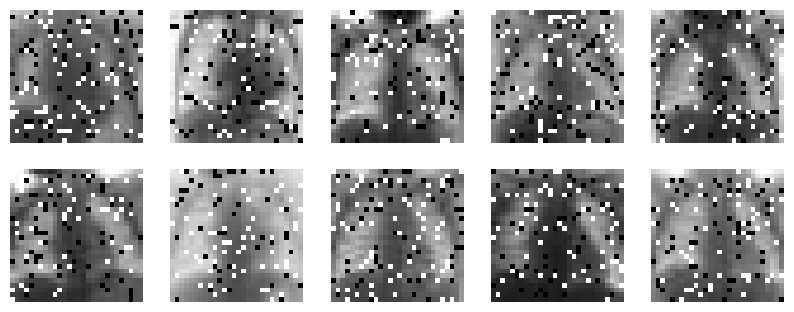

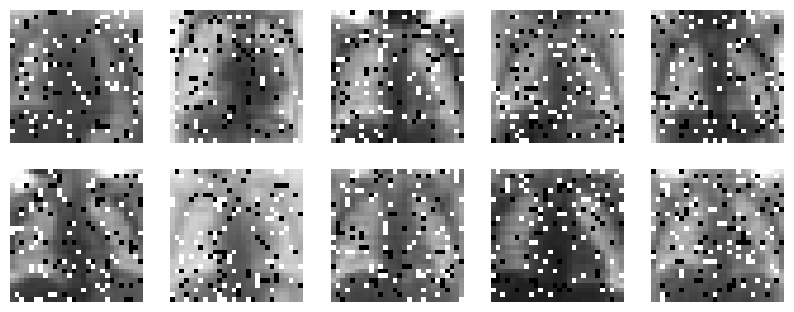

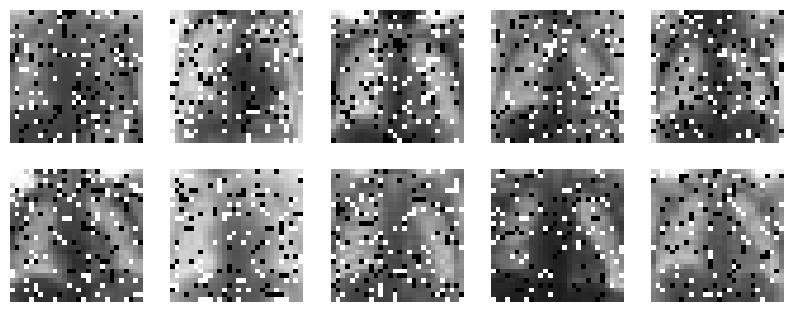

In [8]:
for ii in range(1,10,1):
    print(f"noise probability = {2*i/100.}")
    d = np.load(f"./saved_data_PneumoniaMNIST/snp_{ii/100.0}_{seed}.npz")['arr_0']
    l = np.load(f"./saved_data_PneumoniaMNIST/test_labels.npz")['arr_0']
    plt.figure(figsize=(10, 10))
    for i in range(10):
        plt.subplot(5, 5, i + 1)
        plt.imshow(d[i+2][0], cmap=plt.cm.binary)
        plt.axis("off")
        #plt.title(class_names[l[i+2]])
    #plt.show()
    print(ii,end='')
    plt.savefig(f"./saved_data_PneumoniaMNIST/snp_{str(ii/100.0)}.png",dpi=500,transparent=False)
    plt.savefig(f"./saved_data_PneumoniaMNIST/snp_{str(ii/100.0)}.ps")

In [9]:
if create:
  for i in tqdm([i for i in range(1,10)]+[i/10 for i in range(1,10)]):
    sampled_images = np.load(f"./saved_data_PneumoniaMNIST/test_seqs_{seed}.npz")['arr_0']
    sampled_labels = np.load("./saved_data_PneumoniaMNIST/test_labels.npz")['arr_0']
    sigma = (i*0.1)**0.5
    mean = 0
    for j in range(len(sampled_labels)):
      for _ in range(len(sampled_images[j])):
        row,col = sampled_images[j][_].shape
        # gauss = np.array(np.random.normal(mean,sigma,size=(28,28))).reshape(row,col)
        gauss = np.array(np.random.randn(row*col)) #* var ** 0.5 + mean
        gauss = gauss*sigma + mean
        gauss = gauss.reshape(row,col)
        sampled_images[j][_] = sampled_images[j][_] + gauss
    np.savez_compressed(f"./saved_data_PneumoniaMNIST/gauss_{round(i/10., 2)}_{seed}.npz",sampled_images)

In [10]:
for ii in range(1,10,1):
    d = np.load(f"./saved_data_PneumoniaMNIST/gauss_{ii/100.0}_{seed}.npz")['arr_0']
    l = np.load(f"./saved_data_PneumoniaMNIST/test_labels.npz")['arr_0']
    plt.figure(figsize=(10, 10))
    for i in range(10):
        plt.subplot(5, 5, i + 1)
        plt.imshow(d[i+2][0], cmap=plt.cm.binary)
        plt.axis("off")
        #plt.title(class_names[l[i+2]])
    #plt.show()
    print(ii,end='')
    plt.savefig(f"./saved_data_PneumoniaMNIST/gau_{str(ii/100.0)}.png",dpi=500,transparent=False)
    plt.savefig(f"./saved_data_PneumoniaMNIST/gau_{str(ii/100.0)}.ps")

FileNotFoundError: [Errno 2] No such file or directory: './saved_data_PneumoniaMNIST/gauss_0.01_42.npz'

In [1]:
import pennylane as qml
import pennylane.numpy as np

In [2]:
index_x=['x0','x1','x2','x3','x4']
index_y=['y0','y1','y2','y3','y4']
def encoder0(image):
    for wire in (index_x+index_y):
        qml.Hadamard(wires=wire)
    for i in range(len(image)):
        y = bin(i)[2:]
        y = '0'*(5-len(y)) + y
        for j in range(len(image[0])):
            if image[i][j]>0.001:
                x = bin(j)[2:]
                x = '0'*(5-len(x)) + x
                qml.RY(image[i][j]/2,wires='gray')
                qml.MultiControlledX(wires=(index_x+index_y+['gray']), control_values=x+y)
                qml.RY(image[i][j]/2,wires='gray')

            

In [3]:
def encoder1(image):
    flat = image.flatten()
    f = flat/np.linalg.norm(flat) #normalized
    ff = np.append(f,[0.]*(1024-28*28))
    
    qml.QubitStateVector(ff,wires=(index_x+index_y))

## Training with no noise in dataset

In [4]:
#train_image=(np.load('./saved_data_PneumoniaMNIST/train_seqs_42.npz')['arr_0']) # train images
#X=np.array([x[0] for x in train_image[0:500]])
#train_label=np.load('./saved_data_PneumoniaMNIST/train_labels.npz')['arr_0']

In [5]:
#Y = np.array([y[0] for y in train_label[0:500]]) # train lables
#Y = Y * 2 - np.ones(len(Y)) # shift label from {0, 1} to {-1, 1}

In [4]:
# iquhack 2023 dataset
train_image=(np.load('./2023_IonQ_Remote/data/images.npy')) # train images
X = train_image*255 # train images
train_label=np.load('./2023_IonQ_Remote/data/labels.npy')
Y = np.array([int(y) for y in train_label]) # train lables
Y = Y * 2 - np.ones(len(Y)) # shift label from {0, 1} to {-1, 1}

In [5]:
def entangling_layer0(input_wires,output_wires,weights):
    
    weights_ = (weight for weight in weights)
    for i in input_wires:
        for j in output_wires:
            qml.CNOT(wires=[i,j])
            
            param = next(weights_)
            qml.RZ(param, wires=j)
            
            param = next(weights_)
            qml.RX(param, wires=j) 
            
            qml.CNOT(wires=[i,j])
            


In [6]:
def entangling_layer1(wires,weights):
    n=len(wires)
    weights_ = (weight for weight in weights)
    for i in range(1,n):
        j = 0
        r = []
        while j <= n-i-1:
            if j not in r:
                qml.CNOT([wires[j],wires[j+i]])
                r += [j+i]
            
                param = next(weights_)
                qml.RZ(param, wires=wires[j])
            
                param = next(weights_)
                qml.RX(param, wires=wires[j]) 
            
                qml.CNOT([wires[j],wires[j+i]])
            j += 1
        for j in r:
            if j+i <= n-1:
                qml.CNOT([wires[j],wires[j+i]])
            
                param = next(weights_)
                qml.RZ(param, wires=wires[j])
            
                param = next(weights_)
                qml.RX(param, wires=wires[j]) 
            
                qml.CNOT([wires[j],wires[j+i]])
   

In [7]:
def pool_circuit(params, wire):
    qml.RZ(-1*np.pi / 2, wire[1])
    qml.CNOT(wire[::-1])
    qml.RZ(params[0], wire[0])
    qml.RY(params[1], wire[1])
    qml.CNOT(wire)
    qml.RY(params[2], wire[1])
def entangling_layer2(sources, sinks, weights):
    # len(params) should be num_qubits / 2 * 3
    param_index = 0
    
    for source, sink in zip(sources, sinks):
        pool_circuit(weights[param_index : (param_index + 3)], [source, sink])
        param_index += 3

In [16]:
# The training circuit
#encoder_wires = ['x0','x1','x2','x3','x4','y0','y1','y2','y3','y4','gray','train']
encoder_wires = ['x0','x1','x2','x3','x4','y0','y1','y2','y3','y4']
dev = qml.device("default.qubit", wires=encoder_wires)
@qml.qnode(dev)
def circuit(weights, image):
    #encoder0(image)
    #entangling_layer0(['x0','x1','x2','x3','x4','y0','y1','y2','y3','y4','gray'],['train'],weights)
    encoder1(image)
    entangling_layer1(['x0','x1','x2','x3','x4','y0','y1','y2','y3','y4'], weights)
    #entangling_layer1(['y0','y1','y2','y3','y4'],weights[0:20])
    #entangling_layer2(index_x, index_y, weights[20:35])
    #entangling_layer1(['x0','x1','x2','x3','x4'],weights[20:40])
    
    
    
    return qml.expval(qml.PauliZ('x0'))


In [9]:
def variational_classifier(weights, bias, x):
    return circuit(weights, x) + bias

In [10]:
def square_loss(labels, predictions):
    loss = 0
    for l, p in zip(labels, predictions):
        loss = loss + (l - p) ** 2

    loss = loss / len(labels)
    return loss

In [11]:
def accuracy(labels, predictions):

    loss = 0
    for l, p in zip(labels, predictions):
        if abs(l - p) < 1e-5:
            loss = loss + 1
    loss = loss / len(labels)

    return loss

In [12]:
def cost(weights, bias, X, Y):
    predictions = [variational_classifier(weights, bias, x) for x in X]
    return square_loss(Y, predictions)

In [17]:
import pennylane.numpy as np
np.random.seed(42)
#weights_init = np.random.randn(55, requires_grad=True) #for entangling_layer1+2
bias_init = np.array(0.0, requires_grad=True)
weights_init = np.random.randn(90, requires_grad=True) #for entangling_layer1



In [14]:
from pennylane.optimize import NesterovMomentumOptimizer
opt = NesterovMomentumOptimizer(0.2)
batch_size = 5

In [18]:
weights = weights_init
bias = bias_init
predictions_init = [np.sign(variational_classifier(weights_init, bias_init, x)) for x in X]
acc_init = accuracy(Y, predictions_init)
print(acc_init)
for it in range(25):

    # Update the weights by one optimizer step
    batch_index = np.random.randint(0, len(X), (batch_size,))
    X_batch = X[batch_index]
    Y_batch = Y[batch_index]
    weights, bias, _, _ = opt.step(cost, weights, bias, X_batch, Y_batch)
    print('weights updated')

    # Compute accuracy
    predictions = [np.sign(variational_classifier(weights, bias, x)) for x in X]
    acc = accuracy(Y, predictions)

    print(
        "Iter: {:5d} | Cost: {:0.7f} | Accuracy: {:0.7f} ".format(
            it + 1, cost(weights, bias, X, Y), acc
        )
    )

0.676
weights updated
Iter:     1 | Cost: 0.7384513 | Accuracy: 0.7500000 
weights updated
Iter:     2 | Cost: 0.7610401 | Accuracy: 0.7500000 
weights updated
Iter:     3 | Cost: 0.9080703 | Accuracy: 0.7500000 
weights updated
Iter:     4 | Cost: 1.0342891 | Accuracy: 0.7500000 
weights updated
Iter:     5 | Cost: 0.8947433 | Accuracy: 0.7500000 
weights updated
Iter:     6 | Cost: 0.8641356 | Accuracy: 0.7500000 
weights updated
Iter:     7 | Cost: 0.8837780 | Accuracy: 0.7500000 
weights updated
Iter:     8 | Cost: 0.9158646 | Accuracy: 0.7500000 
weights updated
Iter:     9 | Cost: 0.8115512 | Accuracy: 0.7500000 
weights updated
Iter:    10 | Cost: 0.8175344 | Accuracy: 0.7500000 
weights updated
Iter:    11 | Cost: 0.8645815 | Accuracy: 0.7500000 
weights updated
Iter:    12 | Cost: 0.7017291 | Accuracy: 0.7500000 
weights updated
Iter:    13 | Cost: 0.7215294 | Accuracy: 0.7500000 
weights updated
Iter:    14 | Cost: 0.6927688 | Accuracy: 0.7500000 
weights updated
Iter:    15 

In [19]:
sum(weights - weights_init)

tensor(1.76831995, requires_grad=True)

In [45]:
bias-bias_init

tensor(0.47361073, requires_grad=True)

## Testing with no noise in dataset

In [22]:
# test model with test dataset

test_image=(np.load(f"./saved_data_PneumoniaMNIST/test_seqs_42.npz")['arr_0'])
test_X=np.array([x[0] for x in test_image])
test_label=np.load("./saved_data_PneumoniaMNIST/test_labels.npz")['arr_0']
test_Y = np.array([y[0] for y in test_label]) # test lables
test_Y = test_Y * 2 - np.ones(len(test_Y)) # shift label from {0, 1} to {-1, 1}

In [24]:
test_predictions = [np.sign(variational_classifier(weights, x)) for x in test_X]
test_acc_nonoise = accuracy(test_Y, test_predictions)

In [25]:
print(test_acc_nonoise)

0.759377211606511


## Testing with varying Salt and Pepper noise in dataset

In [ ]:
test_Acc_snp=[]
# test model with test dataset
for i in range(1,10):
    snp_noise_level=0.01*i

    test_image=(np.load(f"./saved_data_PneumoniaMNIST/snp_%.2f_42.npz"%(snp_noise_level))['arr_0'])
    test_X_snp=np.array([x[0] for x in test_image])
    test_label=np.load("./saved_data_PneumoniaMNIST/test_labels.npz")['arr_0']
    test_Y = np.array([y[0] for y in test_label]) # test lables
    test_Y = test_Y * 2 - np.ones(len(test_Y)) # shift label from {0, 1} to {-1, 1}
    test_predictions = [np.sign(variational_classifier(weights, bias, x)) for x in test_X_snp]
    test_acc = accuracy(test_Y, test_predictions)
    test_Acc_snp.append(test_acc)

## Testing with varying Gaussian noise in dataset

In [ ]:
test_Acc_gauss=[]
# test model with test dataset
for i in range(1,10):
    gauss_noise_level=0.01*i

    test_image=(np.load(f"./saved_data_PneumoniaMNIST/gauss_%.2f_42.npz"%(gauss_noise_level))['arr_0'])
    test_X_gau=np.array([x[0] for x in test_image])
    test_label=np.load("./saved_data_PneumoniaMNIST/test_labels.npz")['arr_0']
    test_Y = np.array([y[0] for y in test_label]) # test lables
    test_Y = test_Y * 2 - np.ones(len(test_Y)) # shift label from {0, 1} to {-1, 1}
    test_predictions = [np.sign(variational_classifier(weights, bias, x)) for x in test_X_gau]
    test_acc = accuracy(test_Y, test_predictions)
    test_Acc_gauss.append(test_acc)

In [ ]:
noise_lev=0.01*np.arange(1,10)

print(test_Acc_snp)
print(test_Acc_gauss)
